In [3]:
library(tidytext)
Sentiments

Warning message:
"package 'tidytext' was built under R version 3.6.2"

ERROR: Error in eval(expr, envir, enclos): object 'Sentiments' not found


In [4]:
library(janeaustenR)

ERROR: Error in library(janeaustenR): there is no package called 'janeaustenR'


In [2]:
install.packages("tidytext")
install.packages("janeaustenR")

package 'tidytext' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\11031\AppData\Local\Temp\RtmpGQbOyE\downloaded_packages


Warning message:
"package 'janeaustenR' is not available (for R version 3.6.1)"Warning message:
"Perhaps you meant 'janeaustenr' ?"

In [6]:
get_sentiments("bing")

word,sentiment
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative
aborts,negative


In [8]:
library(janeaustenr) # This package will provide textual data in form of books coauthored by Jane Austen
library(stringr) 
library(tidytext) # Allows to perform efficient text analysis on our data
library(dplyr)

# Performing tidy operation on text such that each row contains single word.

tidy_data = austen_books() %>%
    group_by(book) %>%
    mutate(linenumber = row_number(), 
          chapter = cumsum(str_detect(text, regex("^chapter[\\divxlc]", ignore_case=TRUE)))) %>%
ungroup() %>%
unnest_tokens(word,text)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [9]:
# Use bing lexicon and implement filter over positive words

positive_senti = get_sentiments("bing") %>% 
    filter(sentiment == "positive")

# Use Sense and Sensibility and derive its words to implement sentiment analysis model

tidy_data %>%
    filter(book == "Emma") %>%
    semi_join(positive_senti) %>%
    count(word, sort=TRUE)

Joining, by = "word"

word,n
well,401
good,359
great,264
like,200
better,173
enough,129
happy,125
love,117
pleasure,115
right,92


In [10]:
# Use spread function to segregate data into separate columns of positive and negative sentiments. 
# Use mutate to calculate overall sentiment

library(tidyr)
bing = get_sentiments("bing")
Emma_sentiment = tidy_data %>%
    inner_join(bing) %>%
    count(book = "Emma", index = linenumber %/% 80, sentiment) %>%
    spread(sentiment, n, fill=0) %>%
    mutate(sentiment = positive - negative)

Joining, by = "word"

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<ggproto object: Class FacetWrap, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetWrap, Facet, gg>

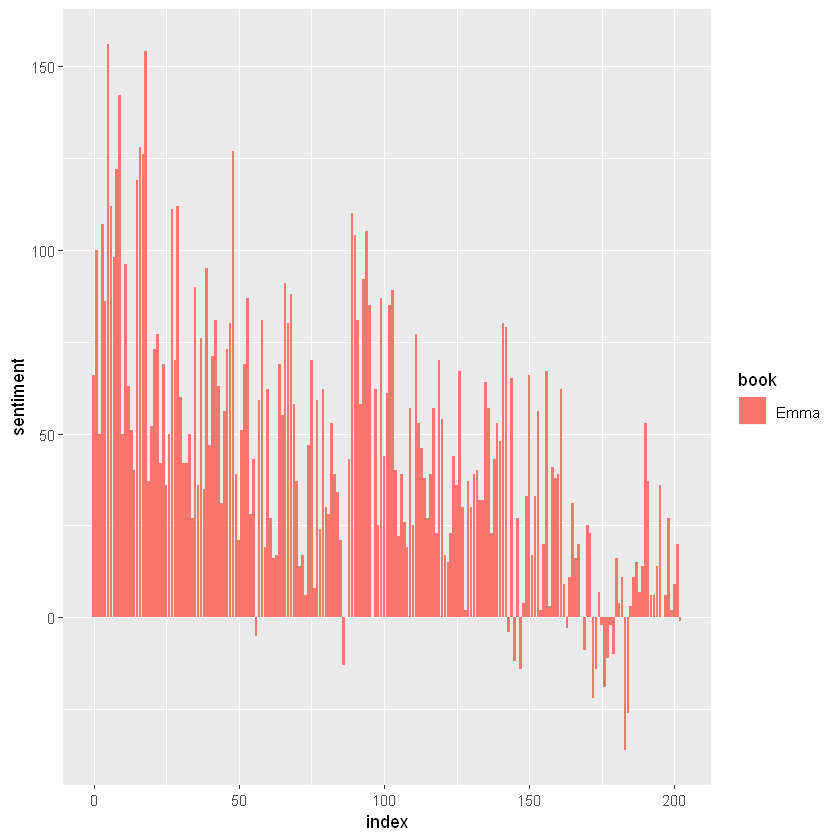

In [11]:
# Visualize words in Emma based on positive and negative scores

library(ggplot2)
ggplot(Emma_sentiment, aes(index,sentiment,fill=book))+
geom_bar(stat="identity", show.legend=TRUE)
facet_wrap(~book, ncol=2, scales="free_x")

In [12]:
# Count most common positive and negative words present in novel

counting_words = tidy_data %>%
    inner_join(bing) %>%
    count(word, sentiment, sort=TRUE)
head(counting_words)

Joining, by = "word"

word,sentiment,n
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639


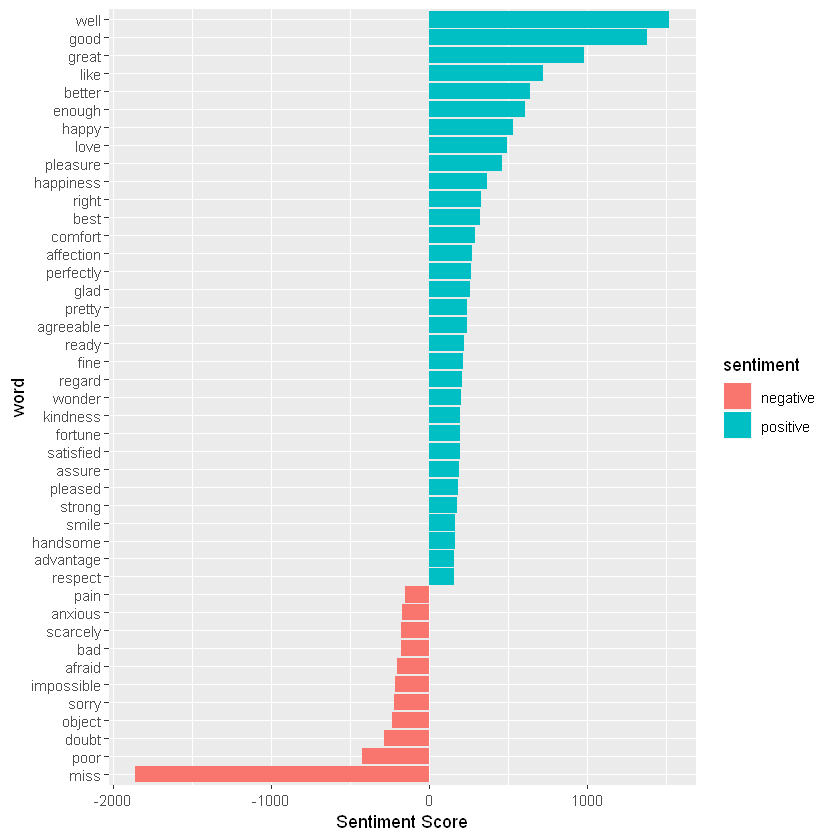

In [13]:
# Visualization of sentiment score

counting_words %>%
    filter(n>150) %>%
    mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(word, n, fill=sentiment)) +
    geom_col() +
    coord_flip() +
    labs(y = "Sentiment Score")


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Warning message:
"package 'wordcloud' was built under R version 3.6.2"Loading required package: RColorBrewer
Joining, by = "word"

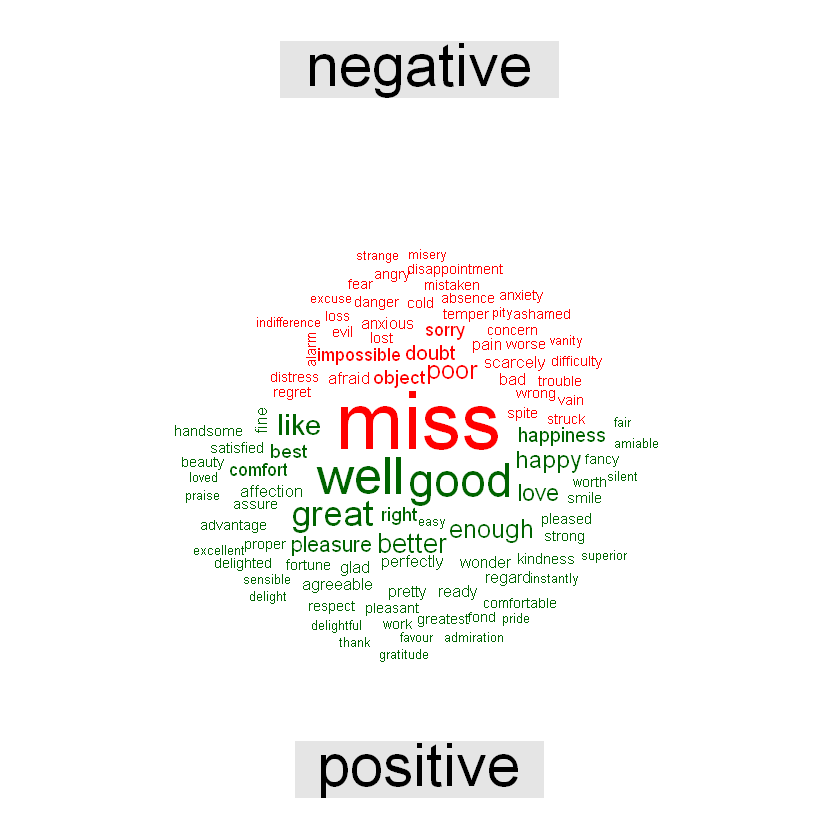

In [14]:
# Use wordcloud to delineate most recurring positive and negative words
# Comparison cloud to plot both positive and negative words in single wordcloud

library(reshape2)
library(wordcloud)
tidy_data %>%
    inner_join(bing) %>%
    count(word, sentiment, sort=TRUE) %>%
    acast(word ~ sentiment, value.var = "n", fill=0) %>%
    comparison.cloud(colors=c("red","dark green"), max.words=100)

In [1]:
install.packages("wordcloud")

package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\11031\AppData\Local\Temp\RtmpGQbOyE\downloaded_packages
